## Download the kaggle dataset and put it in ./data/

[Dataset](https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset/download?datasetVersionNumber=1)

In [1]:
import zipfile
import os
import shutil

zip_location = './data/archive.zip'
extract_to = './data/'

with zipfile.ZipFile(zip_location, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


os.remove("./data/archive.zip")
shutil.rmtree('./data/OriginalDataset') 


FileNotFoundError: [Errno 2] No such file or directory: './data/archive.zip'

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from pathlib import Path
import os.path

In [3]:
"""# Importing the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory('./data/AugmentedAlzheimerDataset/', 
	labels='inferred', 
	label_mode='int', 
	image_size=(256, 256), 
	batch_size=32, 
	shuffle=True, 
	seed=42, 
	validation_split=0.2, 
	subset='training', 
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory('./data/AugmentedAlzheimerDataset/', 
	labels='inferred', 
	label_mode='int', 
	image_size=(256, 256), 
	batch_size=32, 
	shuffle=True, 
	seed=42, 
	validation_split=0.2, 
	subset='validation',
)

print("Class Names: ", train_ds.class_names)
print("Data Shape: ", train_ds.element_spec)"""

Found 33984 files belonging to 4 classes.
Using 27188 files for training.
Found 33984 files belonging to 4 classes.
Using 6796 files for validation.
Class Names:  ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
Data Shape:  (TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [10]:
data_dir = Path('./data/AugmentedAlzheimerDataset/');

train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2,
    shuffle=True) # set validation split

train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

test_ds = train_datagen.flow_from_directory(
    data_dir , # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.


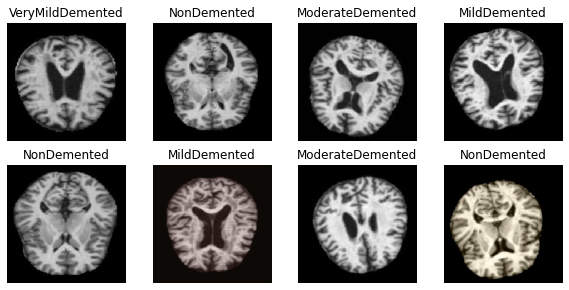

In [31]:
# Show the first 8 images and labels from the training set

plt.figure(figsize=(10, 10))
batch = train_ds.next()
for i in range(0, 8):
    image = batch[0][i]
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    labelIndex = list(batch[1][i]).index(1)
    # get the corresponding label from the train_ds.class_indices
    labels = list(train_ds.class_indices.keys())
    label = labels[labelIndex]
    plt.title(label)
    plt.axis('off')






In [ ]:
MobileNetV3Small = keras.applications.MobileNetV3Small(
	input_shape=(224, 224, 3),
	include_top=False, 
	weights='imagenet')

# Create the model

model = keras.Sequential()

for layer in MobileNetV3Small.layers[:-5]:
	layer.trainable = False

model.add(MobileNetV3Small)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [ ]:
# Compile the model

model.compile(
	optimizer=keras.optimizers.Adam(learning_rate=0.001),
	metrics=['accuracy'],
	loss='binary_crossentropy',
)

# Train the model
history = model.fit(
	train_ds,
	epochs=5, 
	validation_data=test_ds,
	use_multiprocessing=True,
)


Epoch 1/5


ValueError: in user code:

    File "c:\Users\mlg\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\mlg\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mlg\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\mlg\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\mlg\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\mlg\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 256, 256, 3)


In [ ]:
# Show the model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()

In [ ]:
# Create a new model from scratch

"""model = keras.Sequential([
	keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
	keras.layers.MaxPooling2D(),
	keras.layers.Conv2D(64, 3, activation='relu'),
	keras.layers.MaxPooling2D(),
	keras.layers.Flatten(),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')
])"""
"""
# Resize the test and train image data
test_ds_scaled = test_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))
train_ds_scaled = train_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))

model = tf.keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history = model.fit(train_ds_scaled,
    validation_data=test_ds_scaled,
    epochs=10)"""

Epoch 1/10
  7/850 [..............................] - ETA: 55:06 - loss: 0.0000e+00 - accuracy: 0.1964

KeyboardInterrupt: 

In [ ]:
# Show the model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()